# Week 2: Principal Component Analysis

**Student Name 1, Student Name 2** 

In this workshop, we will work through a set of problems on dimensionality reduction -- a cannonical form of unsupervised learning. Within the machine learning pipeline, dimensionality reduction is an important tool, which can used in EDA to understand patterns in the data, feature engineering to create a low-dimensional representation of the inputs, and/or in the final phase when you are presenting and visualizing your solution.

As usual, the worksheets will be completed in teams of 2-3, using **pair programming**, and we have provided cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.
>- In some Exercises, you will see some beneficial hints at the bottom of questions.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday of the week the workshop was given. 

As you work through the problems it will help to refer to your lecture notes (navigator). The exercises here are designed to reinforce the topics covered this week. Please discuss with the tutors if you get stuck, even early on! 

## Outline

1. [Problem Definition and Setup](#setup)

2. [Principal Component Analysis](#pca)

    a. [Examining the Basis Vectors and Scores](#basis)

    b. [Selecting the Number of Components](#nocomponents)

    c. [Other Digits](#other)

3. [Kernel PCA](#kpca)

# Problem Definition and Setup <a id='setup'></a>

## Packages

First, lets load in some packages to get us started. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data

Our dataset will be the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits, which we will download from sklearn. The dataset consists of a set of greyscale images of the numbers 0-9 and corresponding labels. Usually the goal is to train a classifier (i.e. given an image, what digit does it correspond to?). Here we will throw away the labels and focus on the images themselves. Specifically, we will use dimensionality reduction to explore the images and underlying patterns and find a low-dimensional representation.

First, load the data:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',parser = 'auto')
X = mnist.data
y = mnist.target

### 🚩 Exercise 1 (CORE)

What is stored in `X` and `y` in the command above? What is the shape/datatype etc if an array?


In [ ]:
# Exercise 1 (CORE) answer

print("Type of X:", type(X))
print("Type of y:", type(y))

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

print("\nDtypes of X (first 5 columns):")
print(X.dtypes.head())

print("\nDtype of y:", y.dtype)

X_np = X.to_numpy()
y_np = y.to_numpy()

print("\nAfter converting to NumPy:")
print("Type of X_np:", type(X_np))
print("Shape of X_np:", X_np.shape)
print("Dtype of X_np:", X_np.dtype)

print("Type of y_np:", type(y_np))
print("Shape of y_np:", y_np.shape)
print("Dtype of y_np:", y_np.dtype)

print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 20 labels of y:")
print(y[:20])

print("\nUnique labels in y:")
print(np.unique(y))


Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>

Shape of X: (70000, 784)
Shape of y: (70000,)

Dtypes of X (first 5 columns):
pixel1    int64
pixel2    int64
pixel3    int64
pixel4    int64
pixel5    int64
dtype: object

Dtype of y: category

After converting to NumPy:
Type of X_np: <class 'numpy.ndarray'>
Shape of X_np: (70000, 784)
Dtype of X_np: int64
Type of y_np: <class 'numpy.ndarray'>
Shape of y_np: (70000,)
Dtype of y_np: object

First 5 rows of X:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  

X: the MNIST image data (each 28×28 image is flattened into a 784-dimensional feature vector), with shape (70000, 784).

y: the corresponding digit labels (0–9), with shape (70000, ).

X is a pandas DataFrame, and each column may have the same dtype (usually float).

y is a pandas Series, and its dtype may be object/string (this is common when loading from OpenML).

Now, let's create a dictionary, with the digit classes (0-9) as keys, where the correponding values are the set of all images corresponding to that particular label. 

In [3]:
digits_dict = {}
X_= X.values
count = 0

for label in y:
  if label in digits_dict:
    digits_dict[label] += [X_[count]]
  else:
    digits_dict[label] = [X_[count]]
  count += 1

Next let's visualize some of the images. We will start by picking a label and plotting a few images from within the dictionary. Note that each image contains a total of 784 pixels (28 by 28) and we will need to `reshape` the image to plot with `imshow(...,cmap='gray_r')`. Try also changing the label to view different digits.

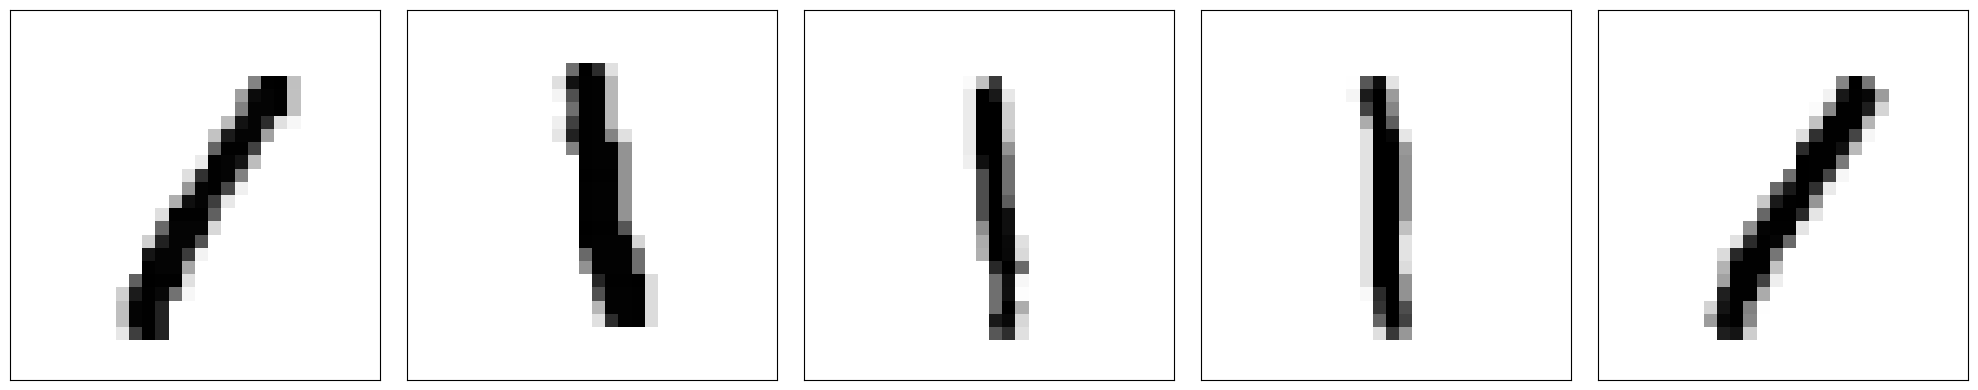

In [4]:
mylabel = '1'
n_images_per_label = 5

fig = plt.figure(figsize=(4*n_images_per_label, 4))
for j in range(n_images_per_label):
    ax_number = 1 + j
    ax = fig.add_subplot(1, n_images_per_label, ax_number)
    ax.imshow(digits_dict[mylabel][j].reshape((28,28)), cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

### 🚩 Exercise 2 (EXTRA)

Edit the code above to plot a few images for multiple labels.

<br>
<details><summary><b><u>Hint</b></u></summary>

Create a vector of labels and add additional for loop in the code above.
</details>

### 🚩 Exercise 2 (EXTRA)

Edit the code above to plot a few images for multiple labels.

<br>
<details><summary><b><u>Hint</b></u></summary>

Create a vector of labels and add additional for loop in the code above.
</details>

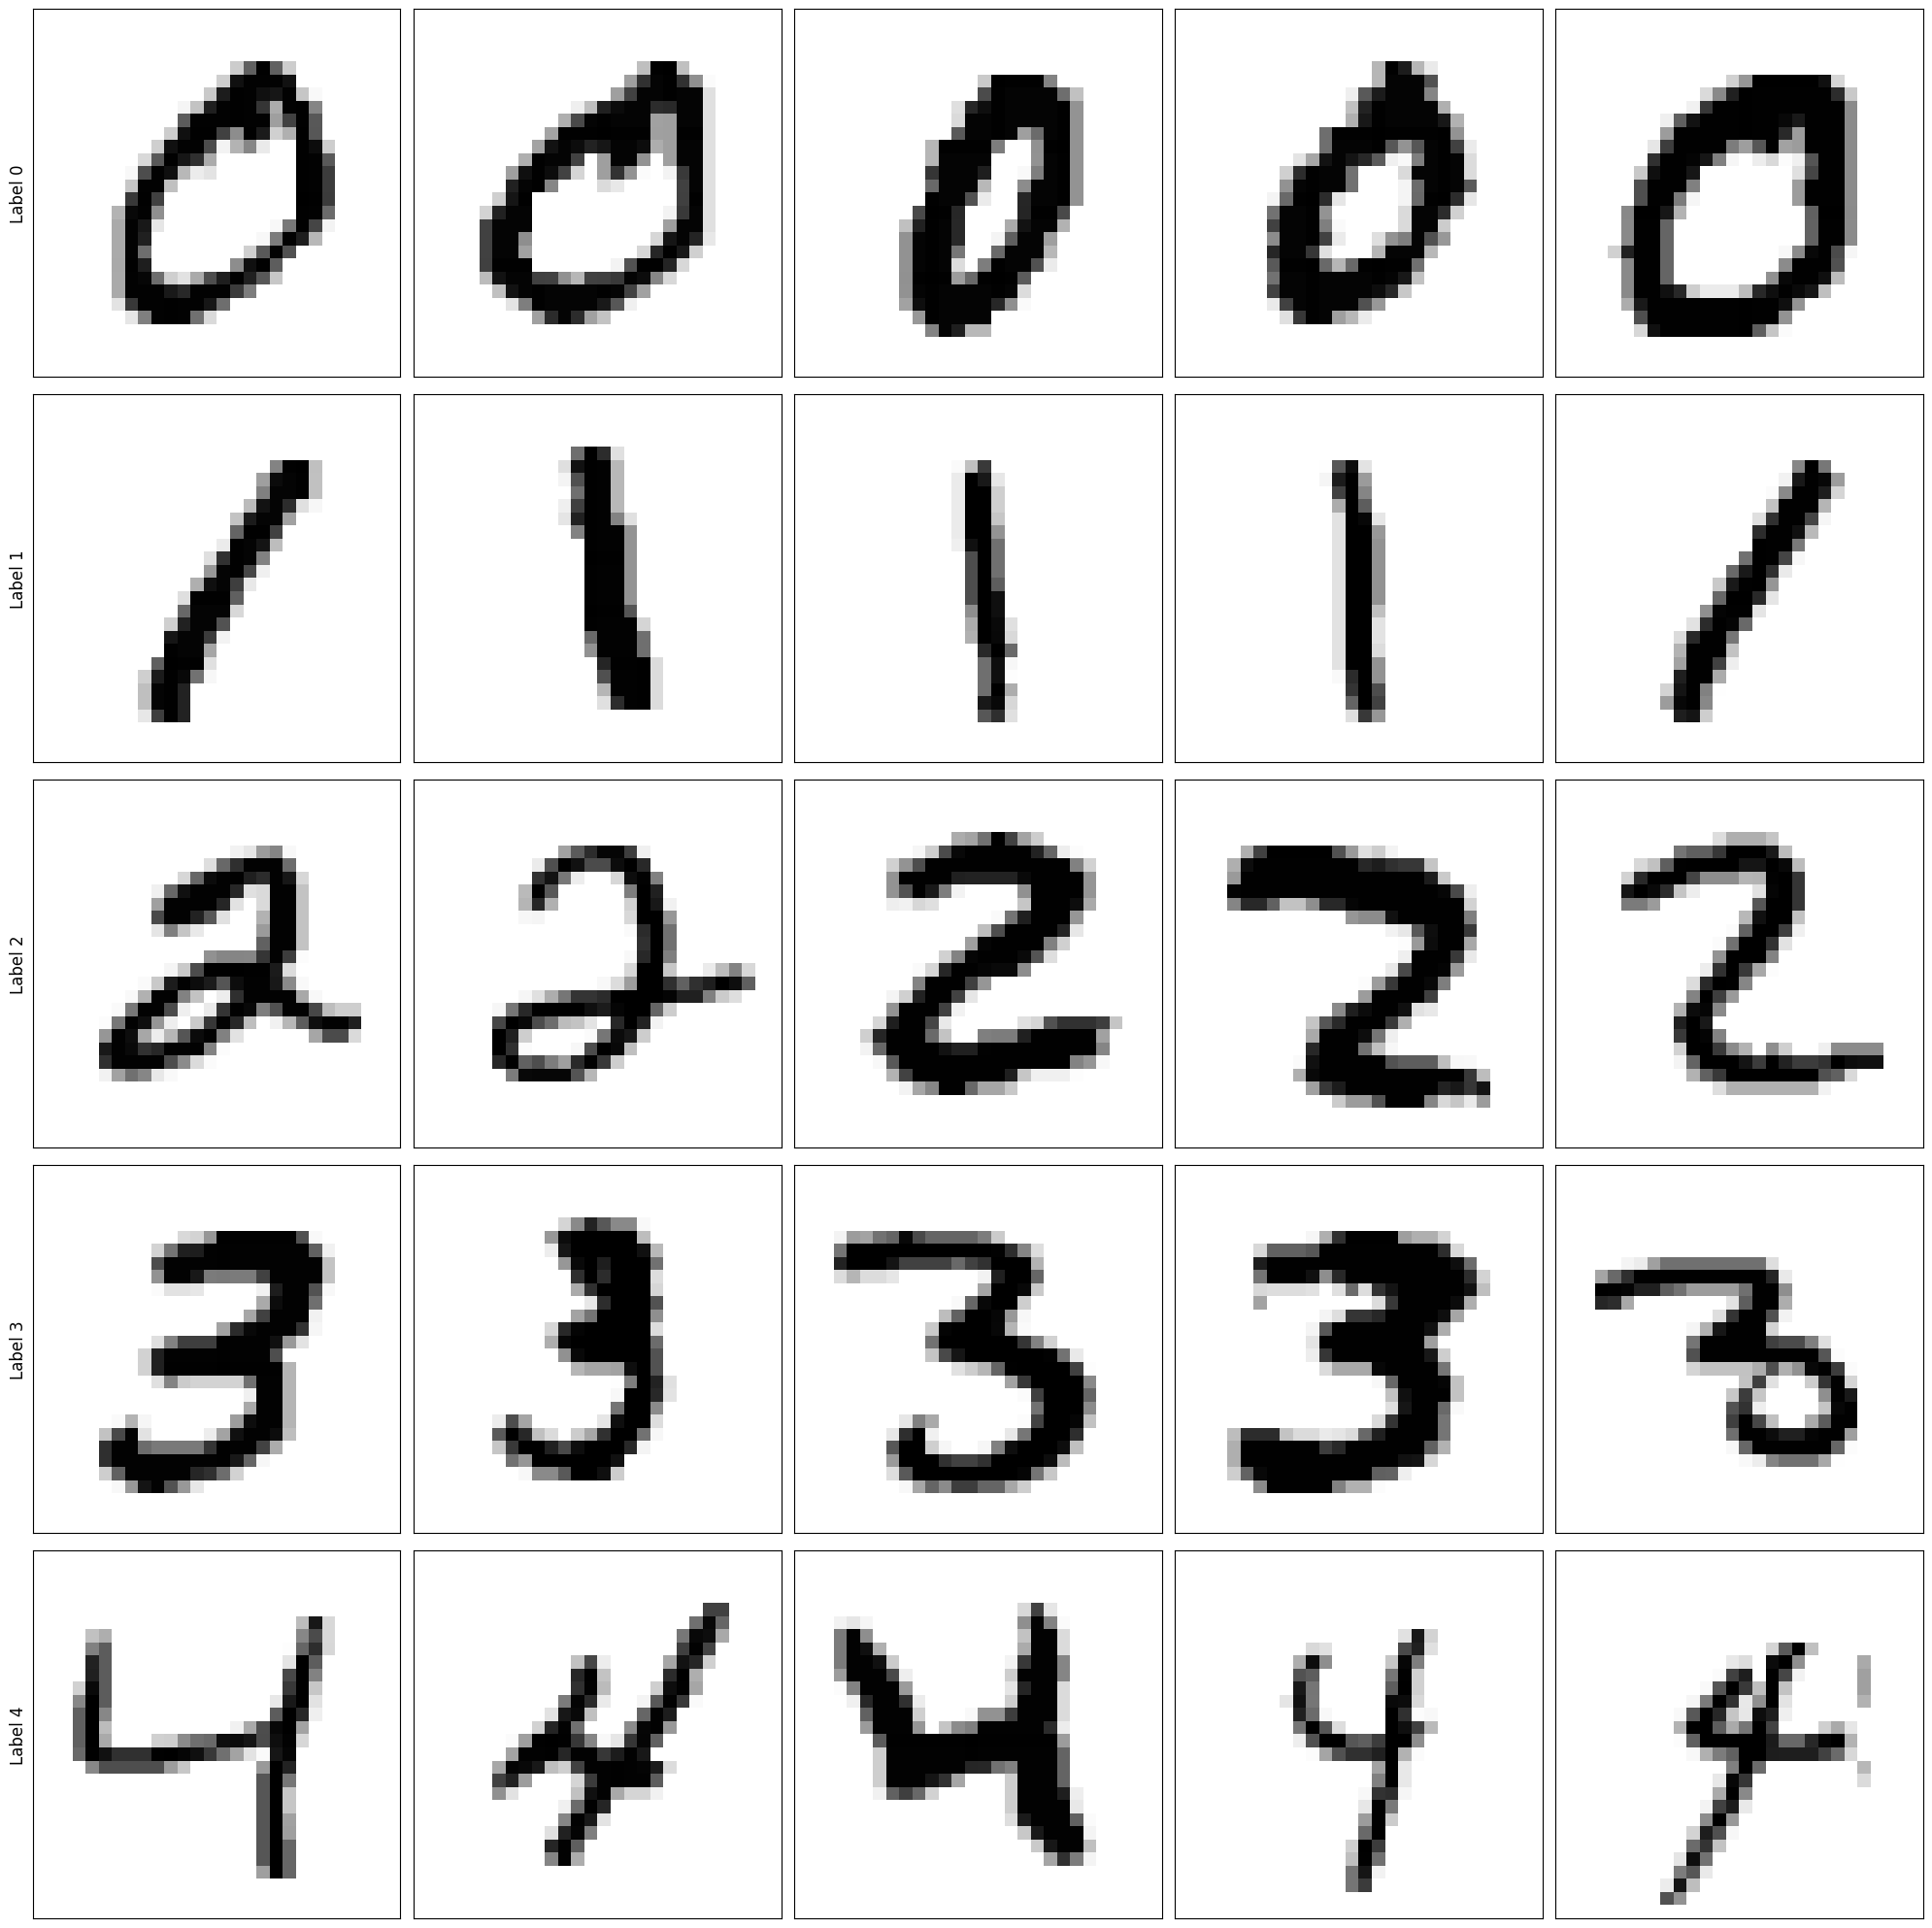

In [6]:
labels_to_plot = ['0', '1', '2', '3', '4'] 
n_images_per_label = 5

fig = plt.figure(figsize=(4 * n_images_per_label, 4 * len(labels_to_plot)))

for row, label in enumerate(labels_to_plot):
    for col in range(n_images_per_label):
        ax = fig.add_subplot(len(labels_to_plot), n_images_per_label, row * n_images_per_label + col + 1)
        ax.imshow(digits_dict[label][col].reshape((28, 28)), cmap='gray_r')
        ax.set_xticks([])
        ax.set_yticks([])
        if col == 0:
            ax.set_ylabel(f"Label {label}", fontsize=12)

fig.tight_layout()
plt.show()

### 🚩 Exercise 3 (CORE)

Now focus on the 3s only and create a data matrix called `X_threes`. Define also `N` (# datapoints) and `D` (# features).

What are the features in this problem? How many features and data points are there? 

In [7]:
# Convert label "3" images into a NumPy array
X_threes = np.array(digits_dict['3'])

# Define number of datapoints (N) and number of features (D)
N = X_threes.shape[0]
D = X_threes.shape[1]

print("X_threes shape:", X_threes.shape)
print("N (number of datapoints):", N)
print("D (number of features):", D)

X_threes shape: (7141, 784)
N (number of datapoints): 7141
D (number of features): 784


Features are the pixel intensity values of each 28×28 image (flattened into a 784-dimensional vector).

There are D = 784 features per datapoint, and N datapoints (the number of images labeled as digit “3”).

### 🚩 Exercise 4 (CORE)

Now compute and plot the mean image of three.

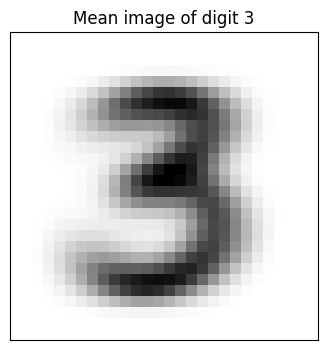

In [8]:
# Compute the mean vector (mean image in flattened form)
X_three_mean = np.mean(X_threes, axis=0)

# Plot the mean image (reshape back to 28x28)
plt.figure(figsize=(4, 4))
plt.imshow(X_three_mean.reshape(28, 28), cmap='gray_r')
plt.title("Mean image of digit 3")
plt.xticks([])
plt.yticks([])
plt.show()

Run the following code to first create a new data matrix that centers the data by subtracting the mean image, and then visualise some of the images and compare to the original data. Note: you will need to replace `X_three_mean` with the name you gave the mean image in the computation above.

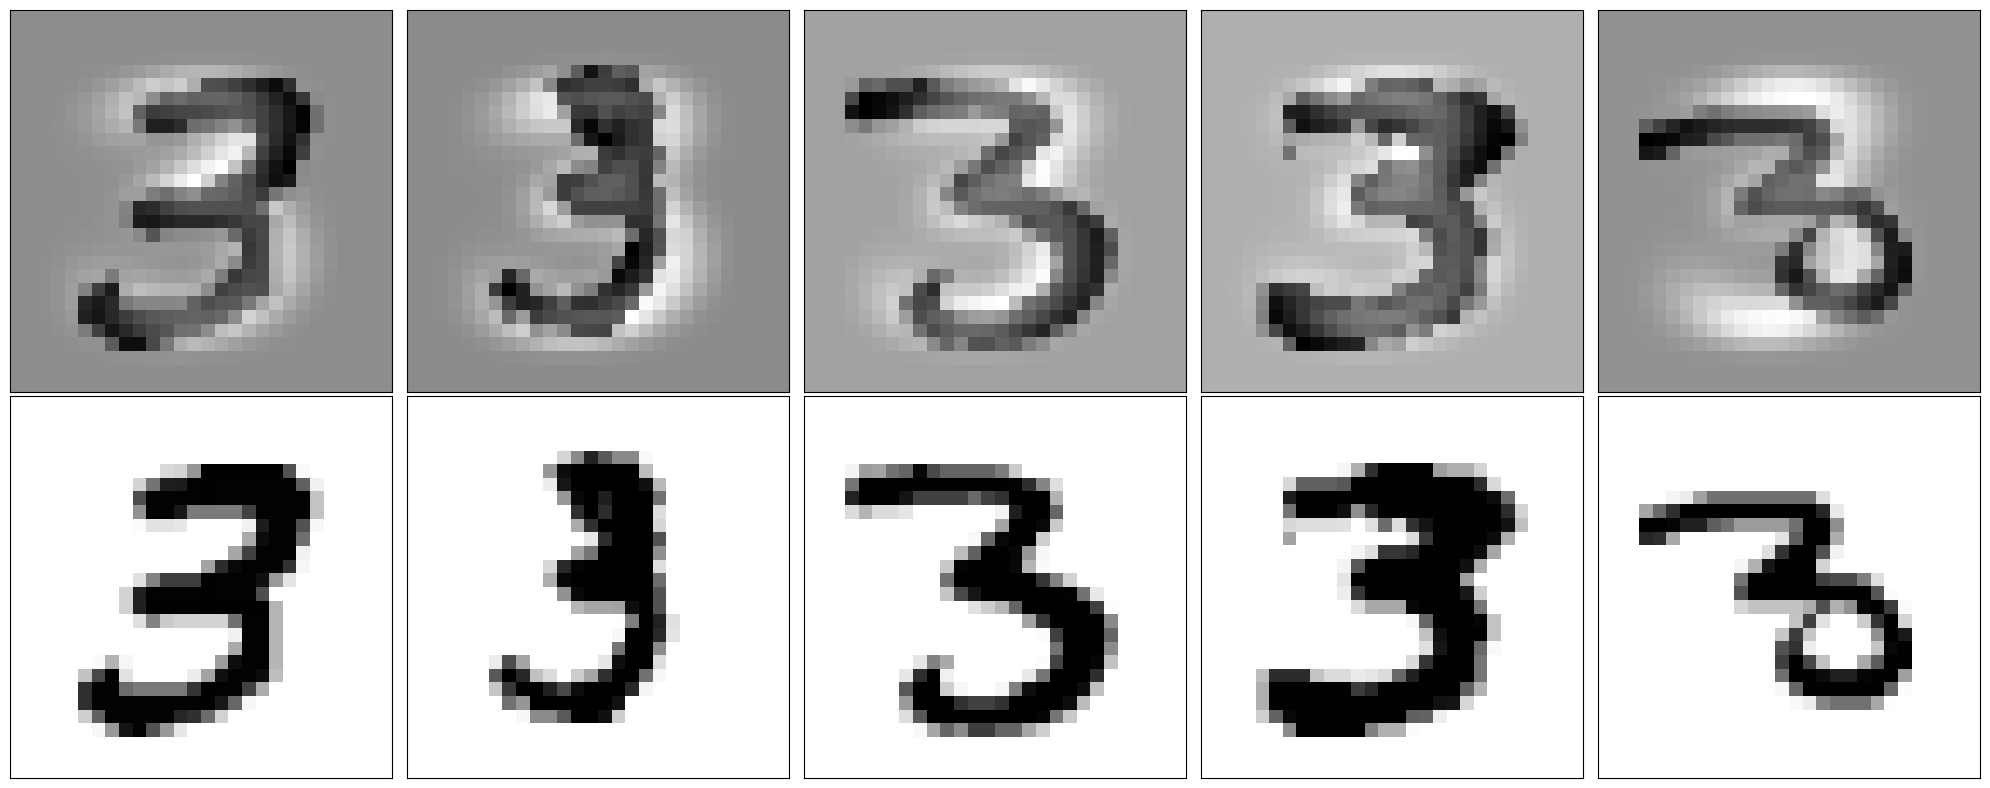

In [9]:
X_three_centred = X_threes - X_three_mean

n_images = 5

fig = plt.figure(figsize=(4*n_images, 4*2))
for j in range(n_images):
  ax = fig.add_subplot(2, n_images, j+1)
  ax.imshow(X_three_centred[j,:].reshape((28,28)), cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])

  ax = fig.add_subplot(2, n_images, j+1+n_images)
  ax.imshow(X_threes[j,:].reshape((28,28)), cmap='gray_r')
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()

### 🚩 Exercise 5 (CORE)

Comment on whether or not the images need to be standardized before using PCA

For PCA, the data should be mean-centered. Standardizing to unit variance is not strictly necessary for MNIST images because all features are pixel intensities on the same scale. However, if different features had very different scales, standardization would be important so that PCA is not dominated by high-variance features.

🏁 **Now, is a good point to switch driver and navigator**

# PCA <a id='pca'></a>

Now, we will perform PCA to summarize the main patterns in the images. We will use the [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transformer from the `sklearn.decomposition` package:

- As we saw last week, we start by creating our transformer object, specifying any parameters as desired. For example, we can specify the number of components with the option `n_components`. If omitted, all components are kept.

- Note that by default the `PCA()` transform centers the variables to have zero mean (but does not scale them). 

- After calling `.fit()`, our fitted object has a number of attributes, including:
    - the mean accessible through the attribute `mean_`.
    - the basis vectors (principal components) accesible through the `components_` attribute.

- There are also a number of methods for the fitted object, including `.transform()` to obtain the low-dimensional representation (or also `fit_transform` combining both together). 

 First, let's create the PCA transformer object and call `.fit()`:

In [10]:
pca_threes = PCA(n_components = 200)
pca_threes.fit(X_threes)

,n_components,200
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


## Examining the Basis Vectors and Scores <a id='basis'></a>

### 🚩 Exercise 6 (EXTRA)
 
Plot the mean image by accessing the `mean_` attribute and check that it is the same as above.

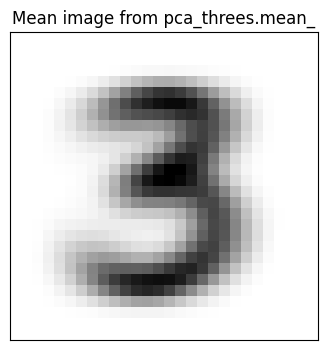

Are the two mean vectors the same (approximately)? True


In [11]:
pca_mean = pca_threes.mean_

plt.figure(figsize=(4, 4))
plt.imshow(pca_mean.reshape(28, 28), cmap='gray_r')
plt.title("Mean image from pca_threes.mean_")
plt.xticks([])
plt.yticks([])
plt.show()

# Check if the PCA mean is the same as the mean computed before
print("Are the two mean vectors the same (approximately)?",
      np.allclose(pca_mean, X_three_mean))


### 🚩 Exercise 7 (CORE)

Plot the the first four basis vectors as images by accessing the `components_` attribute. What patterns do they seem describe? 

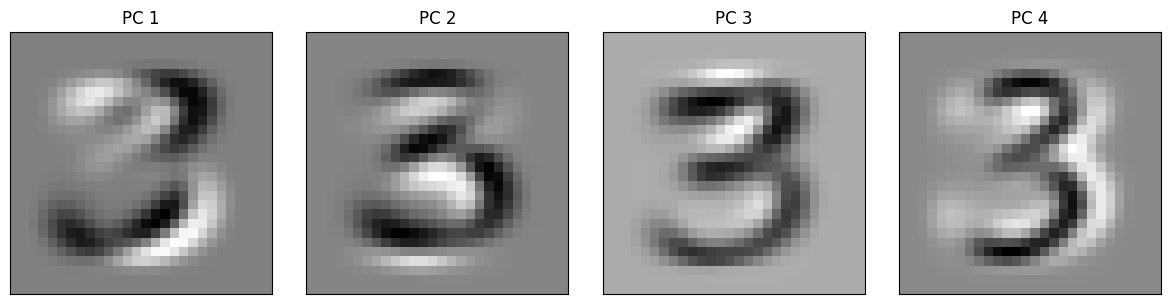

In [12]:
components = pca_threes.components_

n_components_to_plot = 4
fig = plt.figure(figsize=(12, 3))

for i in range(n_components_to_plot):
    ax = fig.add_subplot(1, n_components_to_plot, i + 1)
    ax.imshow(components[i].reshape(28, 28), cmap='gray_r')
    ax.set_title(f"PC {i+1}")
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


The first four principal components capture the main ways the handwritten digit “3” varies across the dataset.

PC1 mainly captures changes in the overall slant/diagonal deformation of the digit and a corresponding shift in the upper part of the “3”.

PC2 largely reflects stroke thickness, i.e., “heavier” versus “lighter” writing.

PC3 appears to describe variations in the top stroke and how open/rounded the upper part of the “3” is.

PC4 captures top–bottom asymmetry, showing how the upper and lower loops vary relative to each other

### 🚩 Exercise 8 (CORE)

a) Use the `transform()` method to compute the PCA scores and save them in an object called `scores`. Then, plot the data points in the low-dimensional space spanned by the first two principal components. 

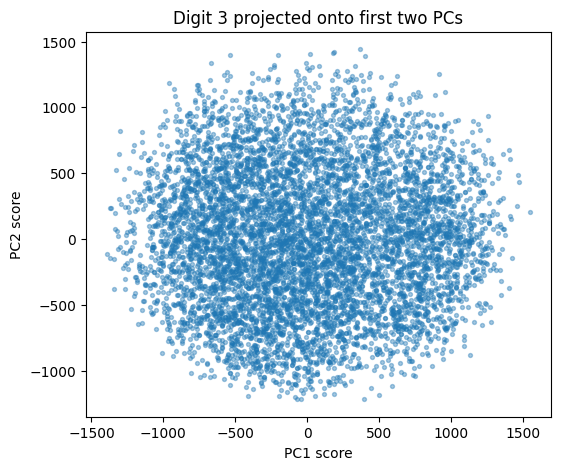

In [13]:
scores = pca_threes.transform(X_threes)

# Scatter plot of the first two principal component scores
plt.figure(figsize=(6, 5))
plt.scatter(scores[:, 0], scores[:, 1], s=8, alpha=0.4)
plt.xlabel("PC1 score")
plt.ylabel("PC2 score")
plt.title("Digit 3 projected onto first two PCs")
plt.show()


To better interpret the latent dimensions, let's look at some projected points along each dimension and the corresponding images. Specifically, run the following code to:

- first compute the $5, 25, 50, 75, 95\%$ quantiles of the scores for the first two dimensions
- then find the data point whose projection is closest to each combination of quantiles.

In [14]:
s1q = np.quantile(scores[:,0],[.05,.25,.5,.75,.95])
s2q = np.quantile(scores[:,1],[.05,.25,.5,.75,.95])

idx = np.zeros([len(s1q),len(s2q)])

for i in range(len(s1q)):
    for j in range(len(s2q)):
        aux = ((scores[:,0] - s1q[i])**2 + (scores[:,1] - s2q[j])**2).reshape(N,1)
        idx[i,j] = np.where(aux == min(aux))[0][0]

idx = idx.astype(int)

b) Now, add these points in red to your plot above in.

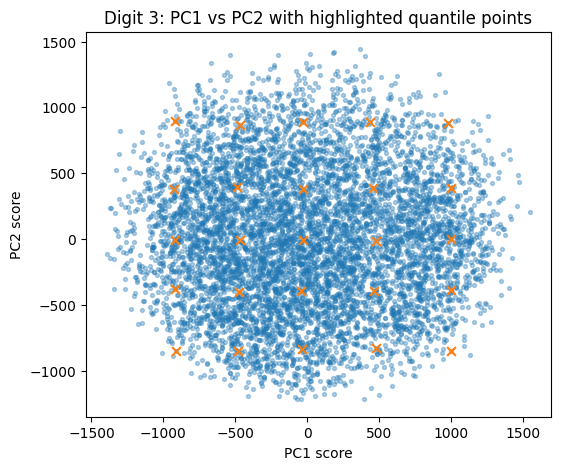

In [15]:
plt.figure(figsize=(6, 5))

# Plot all points
plt.scatter(scores[:, 0], scores[:, 1], s=8, alpha=0.35)

# Highlight selected points (flatten idx to a 1D list of indices)
selected_idx = idx.flatten()
plt.scatter(scores[selected_idx, 0], scores[selected_idx, 1], s=40, marker='x')

plt.xlabel("PC1 score")
plt.ylabel("PC2 score")
plt.title("Digit 3: PC1 vs PC2 with highlighted quantile points")
plt.show()


c) Run the following code to plot the images corresponding to this grid of points. Describe the general pattern of the first (left to right) and second (down to up) principal component.

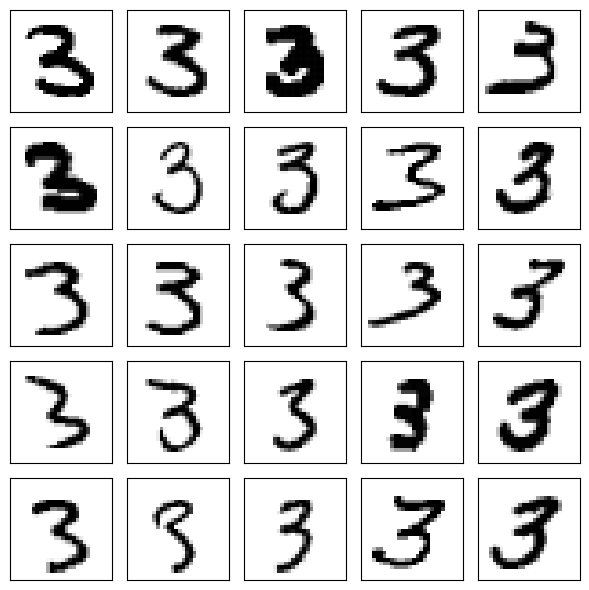

In [16]:
fig, ax = plt.subplots(len(s1q),len(s2q),figsize=(6,6))
for i in range(len(s1q)):
    for j in range(len(s2q)):
        ax[len(s2q)-1-j,i].imshow(X_threes[idx[i,j],:].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()

Along PC1 (left → right), the digit “3” changes mainly in its overall shape/geometry: it transitions from a more rounded, curved “3” to a more flattened/Angular style, where the horizontal strokes (especially the top and lower stroke) become more pronounced and the curves look less round.

Along PC2 (down → up), the dominant variation is stroke intensity/thickness: lower PC2 scores correspond to lighter, thinner writing, while higher PC2 scores correspond to heavier, thicker strokes (darker and bolder “3”s).

You can also try to create some artificial images, by fixing different values of the weights. This can also help to interpret the latent dimensions. 

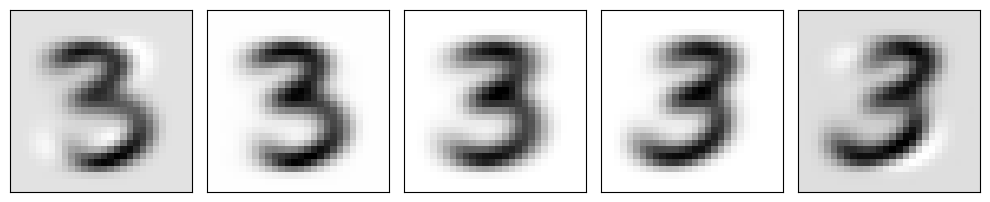

In [17]:
weight1 = np.quantile(scores[:,0],[.05,.25,.5,.75,.95])
weight2 = 0

images_pc1 = np.zeros([len(weight1),D])

count = 0
for w in weight1:   
    images_pc1[count,:] =(pca_threes.mean_ + pca_threes.components_[0,:]*w+pca_threes.components_[1,:]*weight2)
    count += 1
    

fig, ax = plt.subplots(1,len(weight1),figsize=(10,6))
for i in range(len(weight1)):
    ax[i].imshow(images_pc1[i,:].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()

### 🚩 Exercise 9 (CORE)

Repeat this to describe the third principal component. 

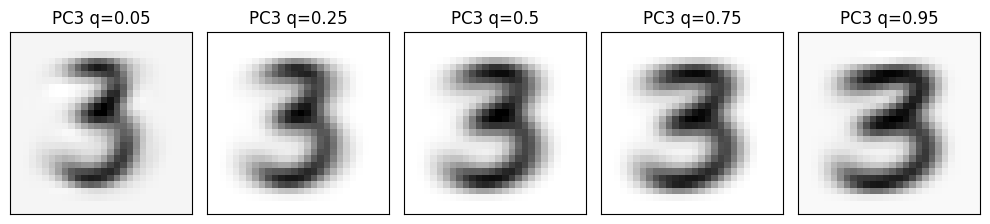

In [18]:
# Choose quantiles of the PC3 scores as weights
weight3 = np.quantile(scores[:, 2], [0.05, 0.25, 0.5, 0.75, 0.95])

# Fix PC1 and PC2 weights
weight1 = 0.0
weight2 = 0.0

images_pc3 = np.zeros((len(weight3), D))

for i, w3 in enumerate(weight3):
    images_pc3[i, :] = (
        pca_threes.mean_
        + weight1 * pca_threes.components_[0, :]
        + weight2 * pca_threes.components_[1, :]
        + w3      * pca_threes.components_[2, :]
    )

fig, ax = plt.subplots(1, len(weight3), figsize=(10, 3))
for i in range(len(weight3)):
    ax[i].imshow(images_pc3[i, :].reshape(28, 28), cmap='gray_r')
    ax[i].set_title(f"PC3 q={ [0.05,0.25,0.5,0.75,0.95][i] }")
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()


Varying the weight of PC3 mainly changes the top part of the digit “3”. As the PC3 weight increases (from q=0.05 to q=0.95), the top horizontal stroke becomes longer and thicker, and the upper loop/upper curve looks more closed and pronounced. Overall, PC3 captures a secondary shape variation related to the emphasis and geometry of the upper stroke of the “3”.

### 🚩 Exercise 10 (EXTRA)

In lecture, we saw that we can also compute the basis vectors from an SVD decomposition of the data matrix. Use the `svd` function in `scipy.linalg` to compute the first three basis vectors and verify that they are the same (up to a change in sign -- note that the signs may be flipped because each principal component specifies a direction in the $D$-dimensional space and flipping the sign has no effect as the direction does not change). 

Does `PCA()` perform principal component analysis using an eigendecomposition of the empirical covariance matrix or using a SVD decomposition of the data matrix?

In [19]:
from scipy.linalg import svd
import numpy as np

# Perform SVD on the centered data matrix
# X_three_centred has shape (N, D)
U, S, Vt = svd(X_three_centred, full_matrices=False)

# First three right singular vectors (basis vectors)
svd_components = Vt[:3, :]

# First three PCA components
pca_components = pca_threes.components_[:3, :]

# Compare PCA and SVD components (up to sign)
for i in range(3):
    corr = np.abs(np.dot(svd_components[i], pca_components[i]))
    print(f"PC{i+1}: absolute dot product =", corr)


PC1: absolute dot product = 0.9999999999999998
PC2: absolute dot product = 1.0
PC3: absolute dot product = 1.0000000000000007


The results show that the principal components obtained from PCA and from SVD are the same up to a sign change.

Scikit-learn’s PCA() is implemented using SVD of the centered data matrix rather than an explicit eigendecomposition of the covariance matrix.

🏁 **Now, is a good point to switch driver and navigator**

## Selecting the Number of Components <a id='nocomponents'></a>

### 🚩 Exercise 11 (CORE)

Next, let's investigate how many components are needed by considering how much variance is explained by each component.

Note that the `pca_threes` object has an attribute `explained_variance_` (variance of each component) and `explained_variance_ratio_` (proportion of variance explained by each component). 

Plot both the proportion of variance explained and the cummulative proportion of variance explained. Provide a suggestion of how many components to use. How much variance is explained by the suggest number of components? Comment on why we may be able to use this number of components in relation to the total number of features.

<br>
<details><summary><b><u>Hint</b></u></summary>

You can use `cumsum()` to compute the cummulative sum of the elements in a vector.
</details>

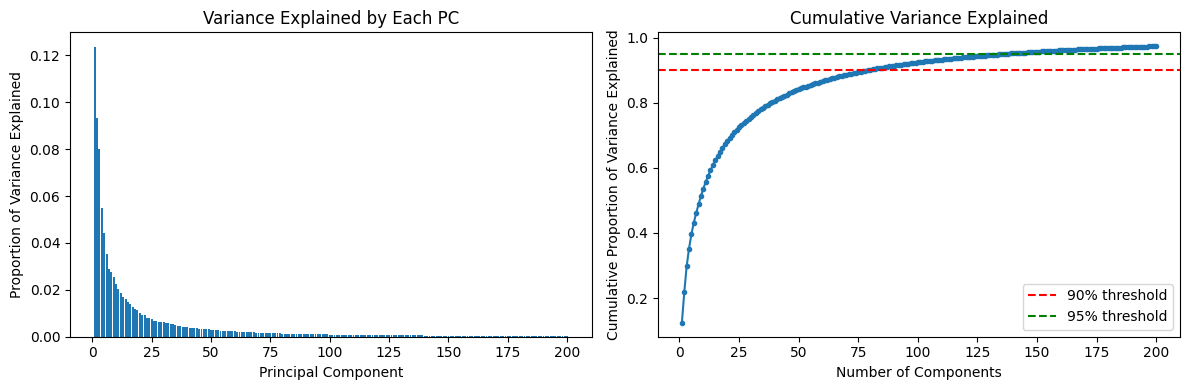

Components needed for 80% variance: 39
  Actual variance explained: 80.24%
Components needed for 90% variance: 80
  Actual variance explained: 90.11%
Components needed for 95% variance: 138
  Actual variance explained: 95.04%


In [ ]:
# Code for your answer here!

var_ratio = pca_threes.explained_variance_ratio_


cumulative_var_ratio = np.cumsum(var_ratio)

# 创建图形
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 左图：每个成分的方差解释比例
ax[0].bar(range(1, len(var_ratio) + 1), var_ratio)
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[0].set_title('Variance Explained by Each PC')

# 右图：累积方差解释比例
ax[1].plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', markersize=3)
ax[1].axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
ax[1].axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
ax[1].set_title('Cumulative Variance Explained')
ax[1].legend()

fig.tight_layout()
plt.show()

# 找出达到不同阈值所需的成分数
for threshold in [0.80, 0.90, 0.95]:
    n_components_needed = np.argmax(cumulative_var_ratio >= threshold) + 1
    print(f"Components needed for {threshold*100:.0f}% variance: {n_components_needed}")
    print(f"  Actual variance explained: {cumulative_var_ratio[n_components_needed-1]*100:.2f}%")

_Type your answer here!_ 

### 🚩 Exercise 12 (CORE)

For your selected number of components, compute the reconstruted images. Plot the reconstruction for a few images and compare with the original images. Comment on the results.  

<br>
<details><summary><b><u>Hint</b></u></summary>

You can use `inverse_transform()` to decode the scores.
</details>

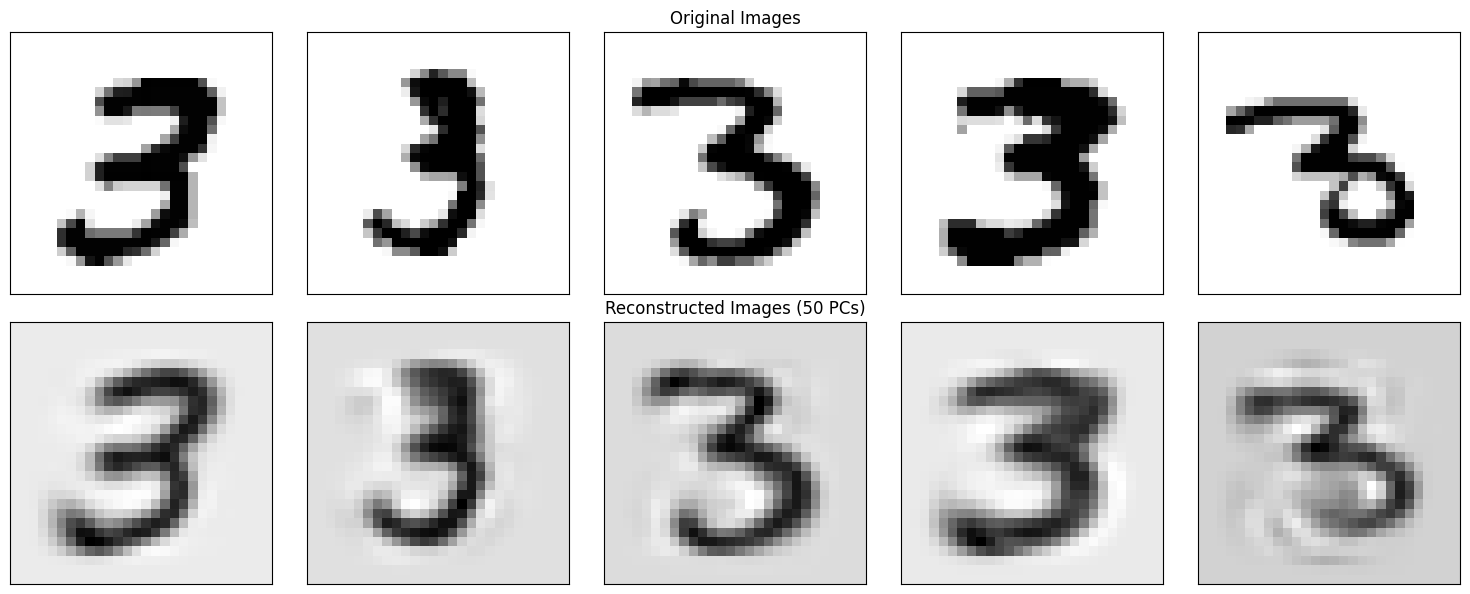

Variance explained by 50 components: 84.09%


In [21]:
# Code for your answer here!
# Select number of components based on Exercise 11 analysis (e.g., 50 components for ~90% variance)
n_components_selected = 50

# Create a new PCA with selected number of components
pca_selected = PCA(n_components=n_components_selected)
pca_selected.fit(X_threes)

# Transform to get scores, then inverse transform to reconstruct
scores_selected = pca_selected.transform(X_threes)
X_reconstructed = pca_selected.inverse_transform(scores_selected)

# Plot original vs reconstructed images
n_images = 5
fig, ax = plt.subplots(2, n_images, figsize=(3 * n_images, 6))

for j in range(n_images):
    # Original images (top row)
    ax[0, j].imshow(X_threes[j].reshape(28, 28), cmap='gray_r')
    ax[0, j].set_xticks([])
    ax[0, j].set_yticks([])
    
    # Reconstructed images (bottom row)
    ax[1, j].imshow(X_reconstructed[j].reshape(28, 28), cmap='gray_r')
    ax[1, j].set_xticks([])
    ax[1, j].set_yticks([])

ax[0, 2].set_title('Original Images')
ax[1, 2].set_title(f'Reconstructed Images ({n_components_selected} PCs)')
fig.tight_layout()
plt.show()

# Print variance explained
print(f"Variance explained by {n_components_selected} components: {sum(pca_selected.explained_variance_ratio_)*100:.2f}%")

The reconstructed images using ~50 principal components closely resemble the original images, preserving the main shape and structure of the digit "3". Some fine details and sharp edges may be slightly blurred, but the overall digit is clearly recognizable.

This demonstrates that PCA can achieve significant dimensionality reduction (from 784 features down to ~50 components) while retaining most of the important information. 

🏁 **Now, is a good point to switch driver and navigator**

## Other Digits <a id='other'></a>

Now, let's consider another digit. 

### 🚩 Exercise 13 (CORE)

Perform PCA for another choice of digit. What do the first two components describe? Do some digits have better approximations than others? Comment on why this may be.

Digit '1': 7877 samples, 784 features


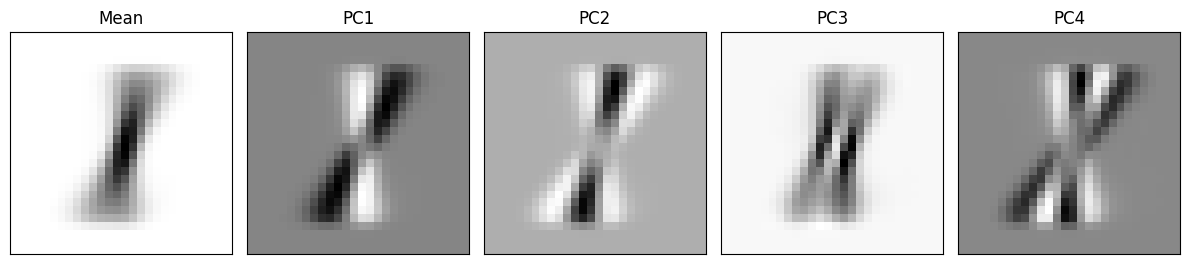

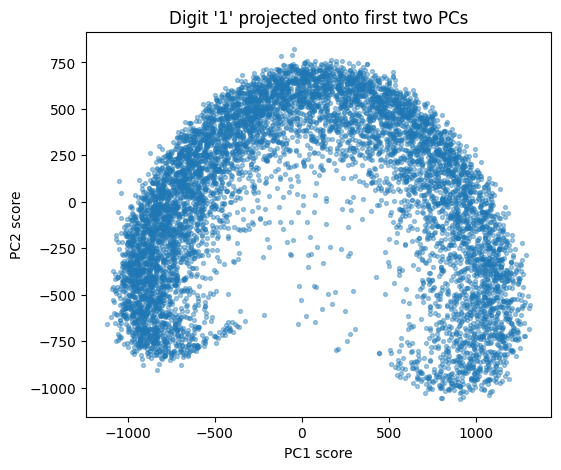

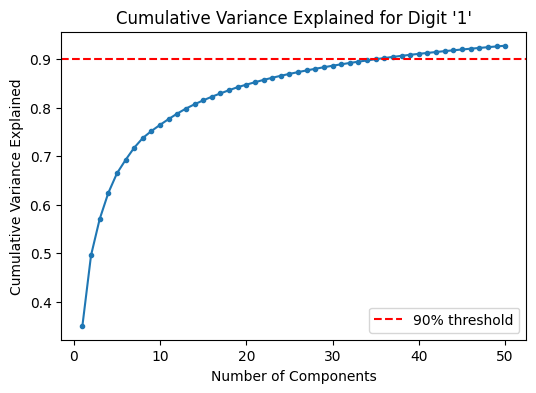

Components needed for 90% variance: 36


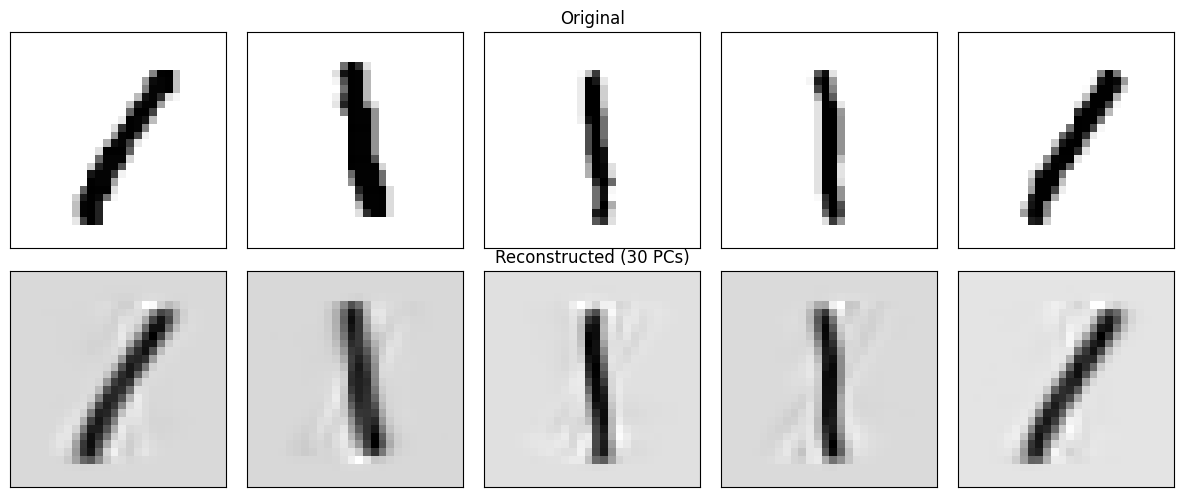

In [22]:
# Cpde for your answer here!
# Choose another digit (e.g., digit '1')
chosen_digit = '1'

# Create data matrix for the chosen digit
X_digit = np.array(digits_dict[chosen_digit])
N_digit = X_digit.shape[0]
D_digit = X_digit.shape[1]

print(f"Digit '{chosen_digit}': {N_digit} samples, {D_digit} features")

# Fit PCA
pca_digit = PCA(n_components=50)
pca_digit.fit(X_digit)

# Plot mean image and first 4 principal components
fig, ax = plt.subplots(1, 5, figsize=(12, 3))
ax[0].imshow(pca_digit.mean_.reshape(28, 28), cmap='gray_r')
ax[0].set_title('Mean')
for i in range(4):
    ax[i+1].imshow(pca_digit.components_[i].reshape(28, 28), cmap='gray_r')
    ax[i+1].set_title(f'PC{i+1}')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

# Plot scores in PC1-PC2 space
scores_digit = pca_digit.transform(X_digit)
plt.figure(figsize=(6, 5))
plt.scatter(scores_digit[:, 0], scores_digit[:, 1], s=8, alpha=0.4)
plt.xlabel('PC1 score')
plt.ylabel('PC2 score')
plt.title(f"Digit '{chosen_digit}' projected onto first two PCs")
plt.show()

# Plot variance explained
cumulative_var = np.cumsum(pca_digit.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', markersize=3)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title(f"Cumulative Variance Explained for Digit '{chosen_digit}'")
plt.legend()
plt.show()

# Find components needed for 90% variance
n_90 = np.argmax(cumulative_var >= 0.90) + 1
print(f"Components needed for 90% variance: {n_90}")

# Compare reconstruction quality
n_comp = 30
pca_recon = PCA(n_components=n_comp)
pca_recon.fit(X_digit)
X_recon = pca_recon.inverse_transform(pca_recon.transform(X_digit))

# Plot original vs reconstructed
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
for j in range(5):
    ax[0, j].imshow(X_digit[j].reshape(28, 28), cmap='gray_r')
    ax[1, j].imshow(X_recon[j].reshape(28, 28), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
ax[0, 2].set_title('Original')
ax[1, 2].set_title(f'Reconstructed ({n_comp} PCs)')
fig.tight_layout()
plt.show()

PC1 mainly captures the slant/tilt of the digit (vertical vs diagonal orientation)
PC2 captures variations in stroke thickness and the shape of the base/top of the digit

Yes. Simpler digits like '1' require fewer components to achieve good reconstruction compared to more complex digits like '3' or '8'.

### Exercise 14 (EXTRA)

Finally, consider now two digits of your choice (edit the code below if you wish to pick different digits).


In [23]:
# Extract data 
X_twodigits = np.concatenate((digits_dict['3'], digits_dict['8']))
N, D = X_twodigits.shape

Run the following code to compute and plot the mean and some of the principle components for this dataset. 

In [24]:
# Fit PCA
pca_digits = PCA(n_components = 50)
pca_digits.fit(X_twodigits)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


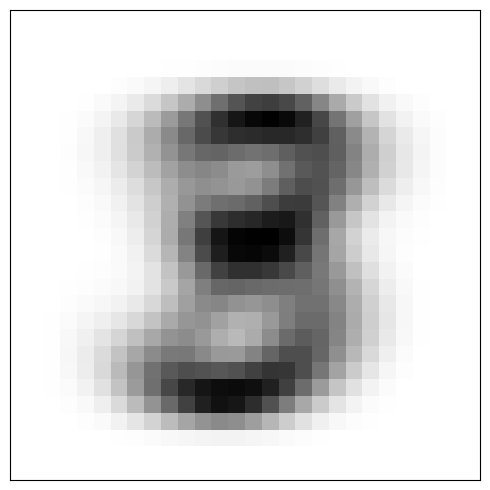

In [25]:
# Plot the mean image
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(pca_digits.mean_.reshape(28, 28), cmap='gray_r')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()

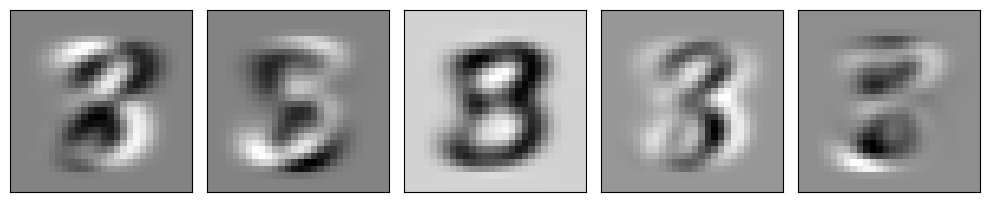

In [26]:
# Plot basis vectors
n_plot = 5
fig, ax = plt.subplots(1,5,figsize=(10,4))
for n in range(n_plot):
  ax[n].imshow(pca_digits.components_[n,:].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
fig.tight_layout()

Plot the projection of the data in the latent space and color the data by the labels. What do you observe?

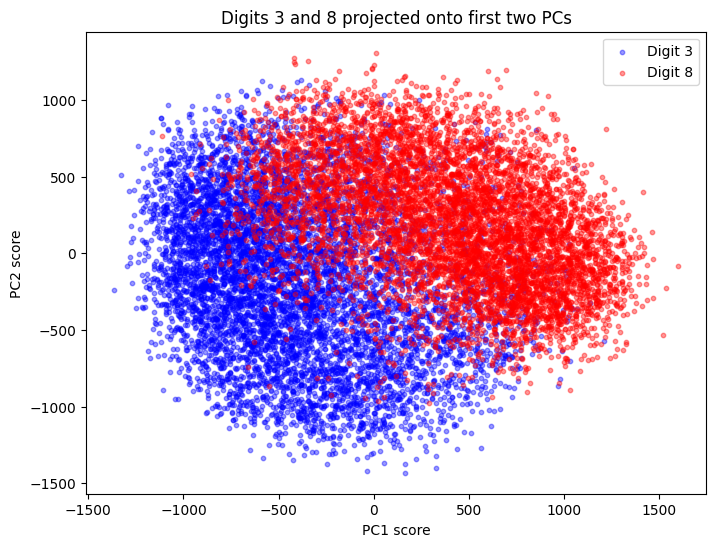

In [28]:
# Code for your answer here!
# Get scores from pca_digits
scores_twodigits = pca_digits.transform(X_twodigits)

# Create labels for the two digits
y_twodigits = np.array(['3'] * len(digits_dict['3']) + ['8'] * len(digits_dict['8']))

# Plot the projection colored by digit labels
plt.figure(figsize=(8, 6))
colors = {'3': 'blue', '8': 'red'}

for digit in ['3', '8']:
    mask = (y_twodigits == digit)
    plt.scatter(scores_twodigits[mask, 0], scores_twodigits[mask, 1], 
                c=colors[digit], label=f'Digit {digit}', s=10, alpha=0.4)

plt.xlabel('PC1 score')
plt.ylabel('PC2 score')
plt.title('Digits 3 and 8 projected onto first two PCs')
plt.legend()
plt.show()

The two digit classes show some separation in the PC1-PC2 space, but there is overlap. PC1 appears to partially separate the digits, as '3' and '8' have different structural characteristics. However, PCA is unsupervised and does not explicitly maximize class separation.

Try also to generate artificial images and decsribe how images change along the PCs. 

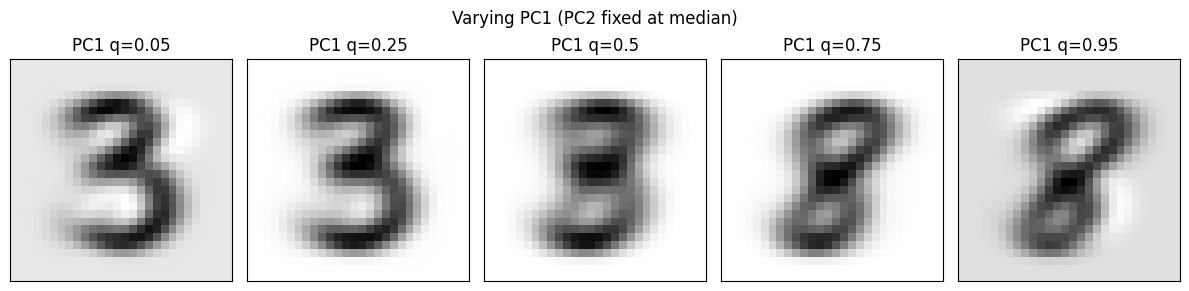

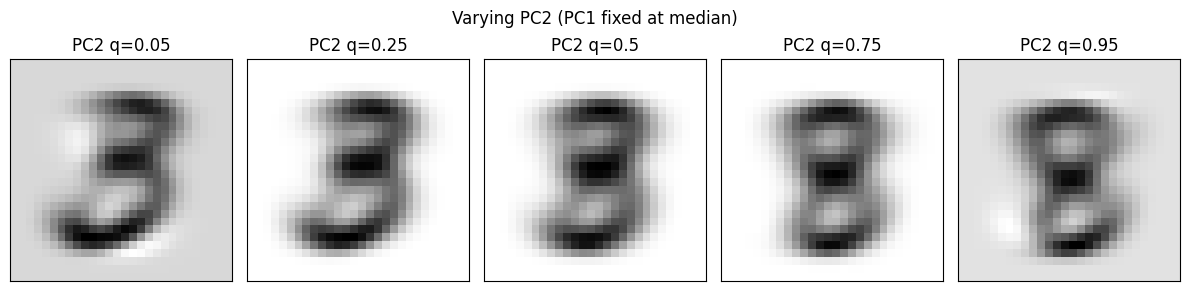

In [29]:
# Code for your answer here!
# Generate artificial images by varying PC1 and PC2 weights
weight_quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

# Vary PC1 (fix PC2 at median)
weight1_values = np.quantile(scores_twodigits[:, 0], weight_quantiles)
weight2_median = np.quantile(scores_twodigits[:, 1], 0.5)

fig, ax = plt.subplots(1, 5, figsize=(12, 3))
for i, w1 in enumerate(weight1_values):
    artificial_img = pca_digits.mean_ + w1 * pca_digits.components_[0, :] + weight2_median * pca_digits.components_[1, :]
    ax[i].imshow(artificial_img.reshape(28, 28), cmap='gray_r')
    ax[i].set_title(f'PC1 q={weight_quantiles[i]}')
plt.setp(ax, xticks=[], yticks=[])
fig.suptitle('Varying PC1 (PC2 fixed at median)')
fig.tight_layout()
plt.show()

# Vary PC2 (fix PC1 at median)
weight1_median = np.quantile(scores_twodigits[:, 0], 0.5)
weight2_values = np.quantile(scores_twodigits[:, 1], weight_quantiles)

fig, ax = plt.subplots(1, 5, figsize=(12, 3))
for i, w2 in enumerate(weight2_values):
    artificial_img = pca_digits.mean_ + weight1_median * pca_digits.components_[0, :] + w2 * pca_digits.components_[1, :]
    ax[i].imshow(artificial_img.reshape(28, 28), cmap='gray_r')
    ax[i].set_title(f'PC2 q={weight_quantiles[i]}')
plt.setp(ax, xticks=[], yticks=[])
fig.suptitle('Varying PC2 (PC1 fixed at median)')
fig.tight_layout()
plt.show()


Along PC1: The images transition between shapes that look more like '3' and shapes that look more like '8'. PC1 captures the main structural difference between these two digits (the middle horizontal bar that distinguishes '8' from '3').
Along PC2: The images show variations in stroke thickness, slant, or overall size, representing secondary variations common to both digit classes

# Kernel PCA <a id='kpca'></a>

Now, let's try using kernel PCA, which is available through sklearn's [`KernelPCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) transformer. As usual we start by creating our object and specifying parameters (see documentation to learn more about the optional parameters). Then, we use the methods `.fit()` and `.transform()` to fit the object and obtain the lower-dimensional representation.

In the code below, we use the radial basis function kernel, with the inverse bandwith parameter `gamma` set to 0.05. Setting, the option `fit_inverse_transform=True` will allow us to reconstruct the images later (and `alpha` is regularization used when inversing the transforming).

_Note:_ we first subsampled the data, as kernel PCA can be slow on large datasets.  

In [32]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Prepare data
y_twodigits = y_twodigits.astype(int)
X_twodigits = MinMaxScaler().fit_transform(X_twodigits)

# Subsample the images (for speed)
X_twodigits_subsampled, X_twodigits_test, y_twodigits_subsampled, y_twodigits_test = train_test_split(
    X_twodigits, y_twodigits, stratify=y_twodigits, random_state=0, train_size=500, test_size=100
)

# Define our KPCA and PCA transformers
n_components = 10
kpca = KernelPCA(
    n_components=n_components, kernel="rbf", gamma=0.05, fit_inverse_transform=True, random_state=0, alpha=0.01)

pca = PCA(n_components=n_components)

# Fit and transform the data
scores_kpca = kpca.fit_transform(X_twodigits_subsampled)
scores_pca = pca.fit_transform(X_twodigits_subsampled)

Next, let's plot the images in the space of the first two components for both kernel PCA and standard PCA.

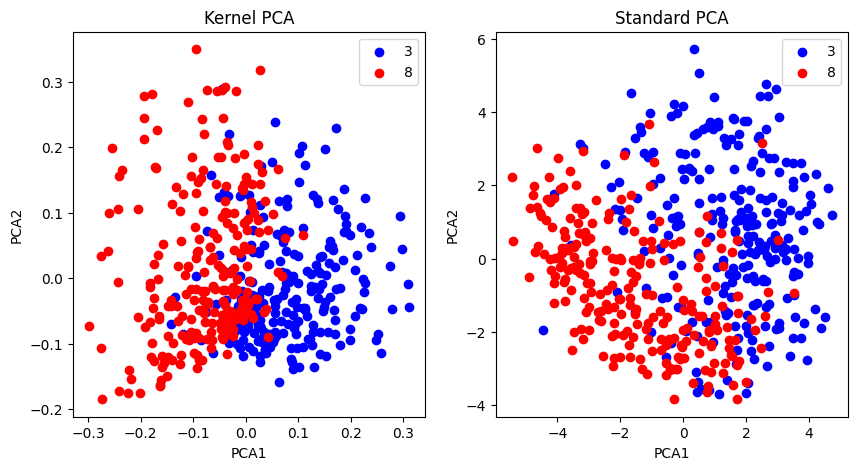

In [36]:
# Plot the images in the space of the first two components, colored by digit
colors = {3: 'blue', 8: 'red'}
i, j = 0, 1 #component indicies
yu =  [3,8] 
fig, ax = plt.subplots(1,2,figsize=(10, 5))
for dig in yu:
    ax[0].scatter(scores_kpca[y_twodigits_subsampled==dig,i], 
               scores_kpca[y_twodigits_subsampled==dig,j],
               c = colors[dig],label=dig)
    ax[1].scatter(scores_pca[y_twodigits_subsampled==dig,i], 
               scores_pca[y_twodigits_subsampled==dig,j],
               c = colors[dig],label=dig)
ax[0].legend()
ax[0].set_xlabel('PCA%d' % (i+1))
ax[0].set_ylabel('PCA%d' % (j+1))
ax[0].set_title('Kernel PCA')
ax[1].legend()
ax[1].set_xlabel('PCA%d' % (i+1))
ax[1].set_ylabel('PCA%d' % (j+1))
ax[1].set_title('Standard PCA')
plt.show()

### Image Denoising
Let's add some noise to our test images that weren't used in the fitting. We will then encode the noisy images into the latent space and then reconstruct our images, to see how well both methods are able to denoise the images.

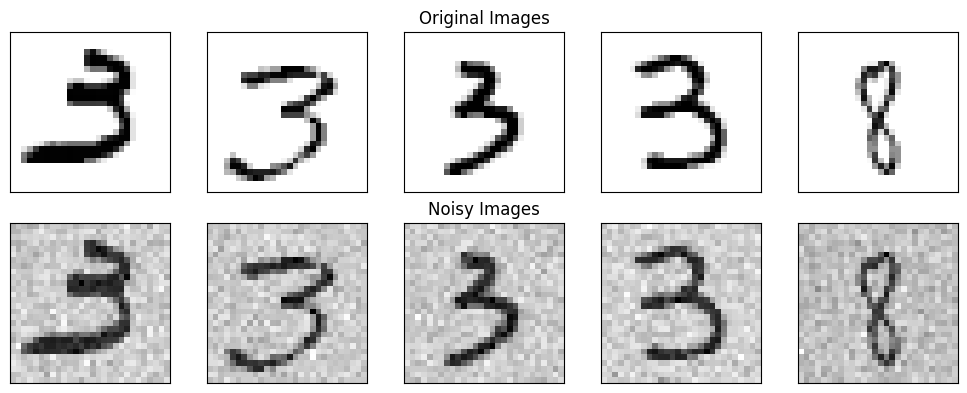

In [34]:
# Add noise to the test images
np.random.seed(0)
noise = np.random.normal(0, 0.1, X_twodigits_test.shape)
X_twodigits_test_noisy = X_twodigits_test + noise

# Plot some noisy test images
n_images = 5
fig, ax = plt.subplots(2,n_images,figsize=(2*n_images, 4))
for j in range(n_images):
    ax[0,j].imshow(X_twodigits_test[j].reshape((28,28)), cmap='gray_r')
    ax[1,j].imshow(X_twodigits_test_noisy[j].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
# Add titles
ax[0,2].set_title('Original Images')
ax[1,2].set_title('Noisy Images')
fig.tight_layout()

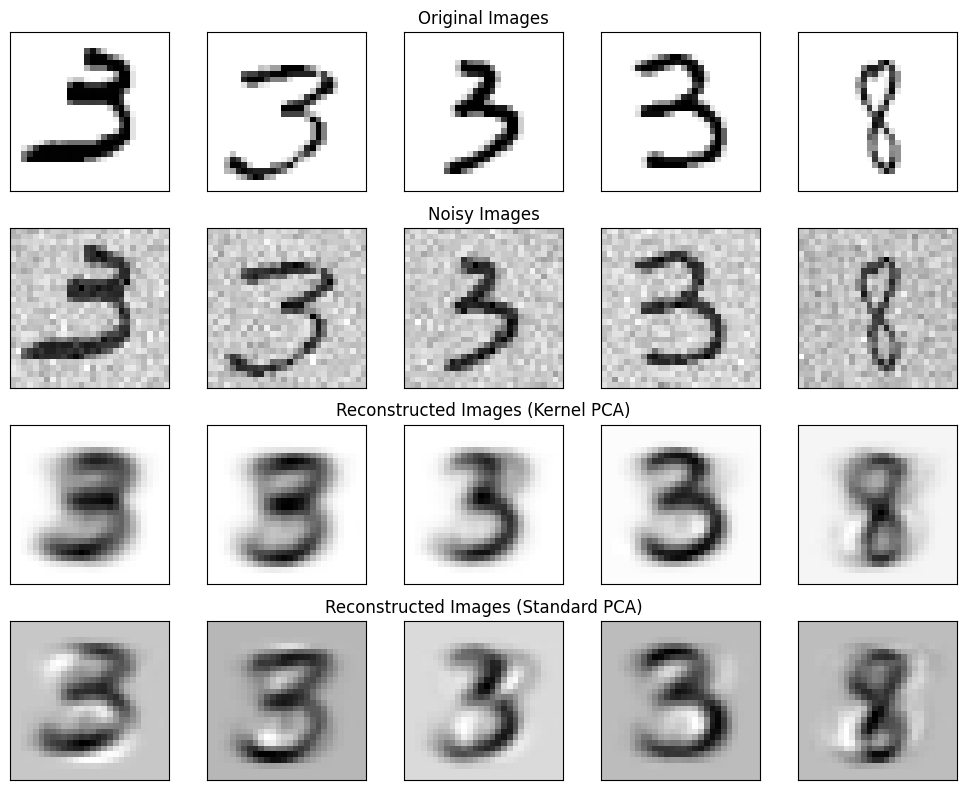

In [35]:
# Now transform the noisy test images using both PCA and KernelPCA
scores_kpca_test = kpca.transform(X_twodigits_test_noisy)
scores_pca_test = pca.transform(X_twodigits_test_noisy)

# And reconstruct the noisy test images using both PCA and KernelPCA
X_reconstructed_kpca = kpca.inverse_transform(
    scores_kpca_test)
X_reconstructed_pca = pca.inverse_transform(
    scores_pca_test)

# Plot some reconstructed images
n_images = 5
fig, ax = plt.subplots(4,n_images,figsize=(2*n_images, 8))
for j in range(n_images):
    ax[0,j].imshow(X_twodigits_test[j].reshape((28,28)), cmap='gray_r')
    ax[1,j].imshow(X_twodigits_test_noisy[j].reshape((28,28)), cmap='gray_r')
    ax[2,j].imshow(X_reconstructed_kpca[j].reshape((28,28)), cmap='gray_r')
    ax[3,j].imshow(X_reconstructed_pca[j].reshape((28,28)), cmap='gray_r')
plt.setp(ax, xticks=[], yticks=[])
# Add titles
ax[0,2].set_title('Original Images')
ax[1,2].set_title('Noisy Images')
ax[2,2].set_title('Reconstructed Images (Kernel PCA)')
ax[3,2].set_title('Reconstructed Images (Standard PCA)')
fig.tight_layout()

### Exercise 15 (EXTRA)

a) Try changing the `gamma`. What happens when you increase, e.g. `gamma=0.1`? Or decrease `gamma=0.01`? 

gamma=0.01 (smaller): The kernel becomes "wider", meaning each point influences more neighbors. Reconstructions are smoother but may lose detail. The model captures more global structure.
gamma=0.05 (default): Balanced trade-off between local and global structure.
gamma=0.1 (larger): The kernel becomes "narrower", focusing on local structure. Reconstructions may preserve more detail but can also retain more noise.


b) Try changing the number of components. How does this affect the reconstructed images for both PCA and kernel PCA?
Fewer components (e.g., 5): More aggressive denoising but reconstructions lose fine details; images appear blurry.
More components (e.g., 20): Better detail preservation but less noise removal; may retain some noise artifacts.
This trade-off applies to both PCA and Kernel PCA, but Kernel PCA tends to preserve non-linear structure better.


c) Which method would you prefer for this dataset?
For this dataset, Kernel PCA with appropriate gamma (around 0.05) and moderate components (10-15) generally produces better denoising results. It captures the non-linear manifold structure of digit images better than standard PCA, leading to cleaner reconstructions while preserving digit shapes. However, standard PCA is faster and may be preferred when computational efficiency is important


# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please **change 'Student 1' and 'Student 2' at the top of the notebook to include your name(s)**. 

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [37]:
!jupyter nbconvert --to pdf mlp_week02_key.ipynb 

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'mlp_week02_key.ipynb' matched no files
